Primeiras linhas do conjunto de dados:
         Mes  Energia_Gerada_kWh  Preco_R$/kWh   Horas_Sol  Manutencao  \
0 2021-01-01        27490.802377      0.685214  259.799091           0   
1 2021-02-01        19652.316888      0.446798  158.712542           1   
2 2021-03-01        27218.955200      0.612422  153.087674           1   
3 2021-04-01        36648.852816      0.463702  177.273745           0   
4 2021-05-01        26084.844859      0.557427  214.791753           0   

     Receita_R$  
0  18837.090685  
1   8780.622879  
2  16669.480812  
3  16994.136571  
4  14540.394976  


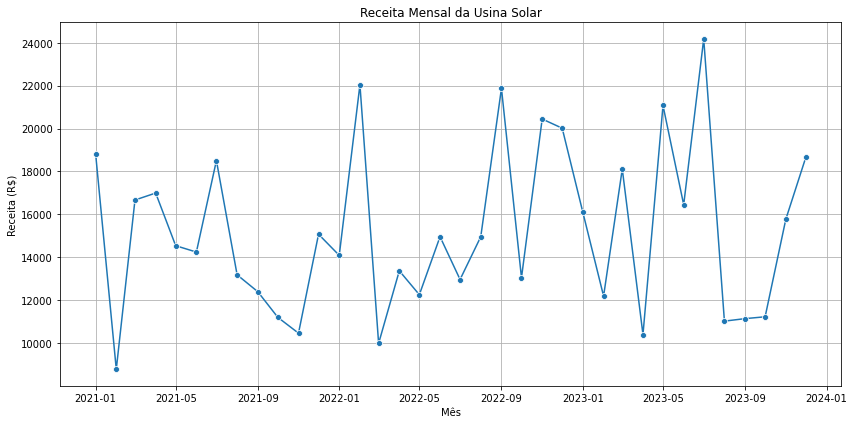

MAE (Erro Médio Absoluto): 551.48 R$
R² (Coeficiente de Determinação): 0.98


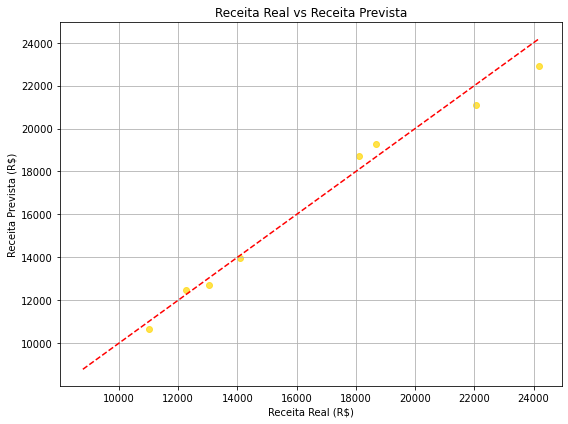

In [2]:
# ----------------------------------------------------------------------------------------
# 🌟 Exercício de Machine Learning: Previsão de Receita de uma Usina Solar
#
# 📝 Descrição:
# Imagine que você gerencia uma pequena usina solar no interior de São Paulo.
# Seu objetivo é prever a receita mensal da usina com base em:
# - Quantidade de energia gerada (kWh),
# - Preço médio da energia (R$/kWh),
# - Horas de sol médias no mês,
# - Manutenção (sim ou não, onde manutenção reduz a geração).
#
# Você vai construir um modelo de regressão para prever a receita mensal.
#
# ⚡ Passos do exercício:
# 1. Criação de dados simulados (3 anos de dados mensais).
# 2. Análise exploratória dos dados.
# 3. Pré-processamento (treino/teste, padronização).
# 4. Treinamento de modelo de regressão.
# 5. Avaliação e visualização dos resultados.
#
# ----------------------------------------------------------------------------------------

# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Etapa 1: Gerar dados fictícios
np.random.seed(42)

# Meses de 2021 a 2023
meses = pd.date_range(start='2021-01-01', end='2023-12-01', freq='MS')

dados = []
for mes in meses:
    energia_gerada = np.random.uniform(20000, 40000)  # Energia gerada no mês em kWh
    preco_energia = np.random.uniform(0.4, 0.7)  # Preço da energia por kWh em R$
    horas_sol = np.random.uniform(150, 300)  # Horas de sol no mês
    manutencao = np.random.choice([0, 1], p=[0.8, 0.2])  # 20% de chance de ter manutenção
    
    # Se houver manutenção, a geração cai 15%
    if manutencao == 1:
        energia_gerada *= 0.85
    
    receita = energia_gerada * preco_energia
    
    dados.append([mes, energia_gerada, preco_energia, horas_sol, manutencao, receita])

# Criar o DataFrame
df = pd.DataFrame(dados, columns=['Mes', 'Energia_Gerada_kWh', 'Preco_R$/kWh', 'Horas_Sol', 'Manutencao', 'Receita_R$'])

# Etapa 2: Análise exploratória
print("Primeiras linhas do conjunto de dados:")
print(df.head())

# Gráfico de receita ao longo do tempo
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Mes', y='Receita_R$', marker='o')
plt.title('Receita Mensal da Usina Solar')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Etapa 3: Pré-processamento dos dados
# Features (X) e Target (y)
X = df[['Energia_Gerada_kWh', 'Preco_R$/kWh', 'Horas_Sol', 'Manutencao']]
y = df['Receita_R$']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Etapa 4: Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Etapa 5: Avaliar o modelo
y_pred = modelo.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Médio Absoluto): {mae:.2f} R$")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Visualização: Real vs Previsto
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='gold', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Receita Real (R$)')
plt.ylabel('Receita Prevista (R$)')
plt.title('Receita Real vs Receita Prevista')
plt.grid(True)
plt.tight_layout()
plt.show()